In [6]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import datasets,models,layers
%matplotlib inline

In [7]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

##or 
## (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


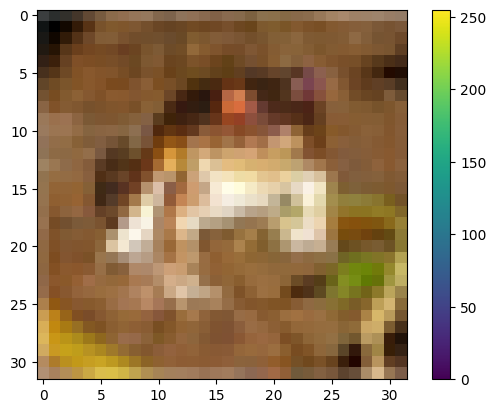

In [9]:
plt.imshow(X_train[0])         ##image of a frog
plt.colorbar()

In [10]:
## To verify that the dataset looks correct, let's plot the first 25 images from the training set 
## and display the class name below each image.

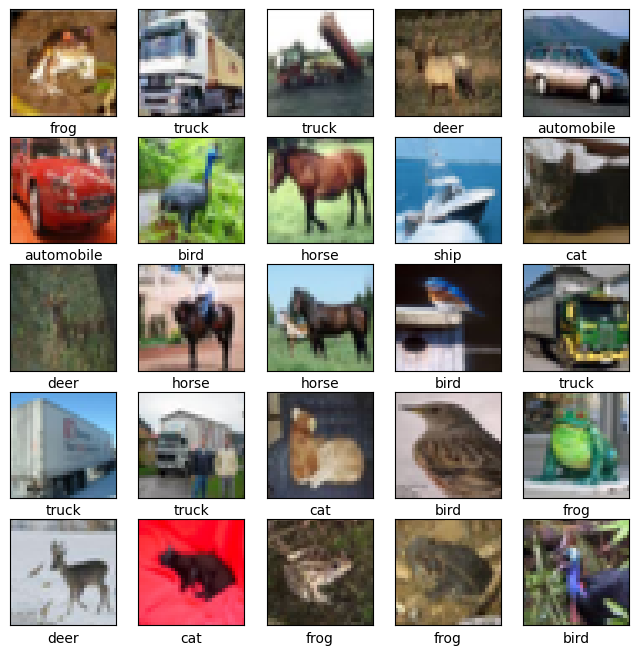

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (class_names[Y_train[i][0]] == 'frog'):
        plt.imshow(X_train[i])
        # The CIFAR labels happen to be arrays,
        #which is why we need the extra index
        plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [12]:
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
# STEP 1 : Building the Model 

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# STEP 2 : Compiling the Model  

model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#STEP 3: Training the Model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 [==============================] - 596s 375ms/step - loss: 3.7877 - accuracy: 0.2144 - val_loss: 1.8443 - val_accuracy: 0.3149
Epoch 2/10
1563/1563 [==============================] - 598s 382ms/step - loss: 1.7129 - accuracy: 0.3778 - val_loss: 1.4184 - val_accuracy: 0.4985
Epoch 3/10
1563/1563 [==============================] - 620s 397ms/step - loss: 1.4035 - accuracy: 0.5006 - val_loss: 1.2700 - val_accuracy: 0.5533
Epoch 4/10
1563/1563 [==============================] - 512s 328ms/step - loss: 1.2636 - accuracy: 0.5565 - val_loss: 1.2034 - val_accuracy: 0.5806
Epoch 5/10
1563/1563 [==============================] - 527s 337ms/step - loss: 1.1904 - accuracy: 0.5833 - val_loss: 1.2069 - val_accuracy: 0.5854
Epoch 6/10
1563/1563 [==============================] - 350s 224ms/step - loss: 1.1461 - accuracy: 0.6000 - val_loss: 1.1171 - val_accuracy: 0.6171
Epoch 7/10
1563/1563 [==============================] - 301s 192ms/step - loss: 1.1140 - accuracy: 0.6101 - val_

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

In [ ]:
# STEP 4 : Predicting   

Y_pred = model.predict(X_train)

print('Prediction Shape is {}'.format(Y_pred.shape))
print('Prediction items are {}'.format(Y_pred[:5]))

1563/1563 [==============================] - 39s 25ms/step
Prediction Shape is (50000, 10)
Prediction items are [[7.32013606e-04 4.87747566e-05 2.26195846e-02 1.97534680e-01
  1.49428146e-02 6.20162725e-01 1.12999514e-01 3.07301283e-02
  4.26737934e-05 1.87026424e-04]
 [1.01379780e-02 7.97135010e-03 2.96806078e-03 5.03572822e-03
  1.16302283e-03 3.72721907e-03 6.09873350e-05 9.54228081e-03
  5.78056742e-03 9.53612745e-01]
 [2.11129505e-02 3.12545076e-02 2.55858595e-03 3.46799521e-03
  5.25900978e-04 3.92762339e-03 4.33381792e-05 2.21632197e-02
  1.84358167e-03 9.13102329e-01]
 [3.67982336e-03 1.39491912e-03 5.97601421e-02 8.01326707e-02
  5.40214956e-01 6.58483729e-02 2.17501432e-01 2.89104935e-02
  6.91690715e-04 1.86548848e-03]
 [3.21206644e-05 9.95256364e-01 8.30156068e-08 8.08787632e-08
  8.17055010e-08 2.26463825e-08 2.07345341e-08 1.41384557e-08
  2.86265004e-05 4.68258793e-03]]


In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_train, Y_train)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

1563/1563 [==============================] - 38s 25ms/step - loss: 0.7117 - accuracy: 0.7891
Model Loss is 0.7116948366165161
Model Accuracy is 0.7890599966049194


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


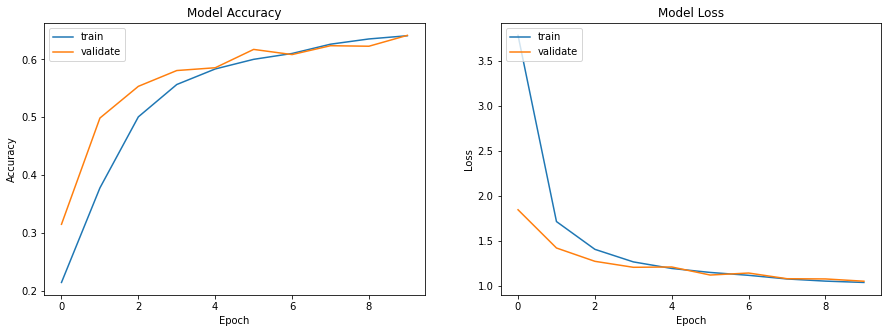

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
plotmodelhistory(history)


In [ ]:
# creating a funtion which will help to verify whether the prediction is true or not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, 
    `                                                  # true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 8s 24ms/step


In [ ]:
predictions[0]

array([0.01305008, 0.00672879, 0.08747022, 0.3204869 , 0.10187716,
       0.24059305, 0.1756612 , 0.02121456, 0.02585995, 0.00705809],
      dtype=float32)

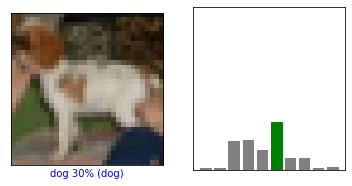

In [ ]:
# call the function
i=12 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, Y_test)
plt.show()

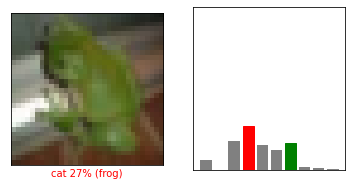

In [ ]:
# calling the function
i=7 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, Y_test)
plt.show()

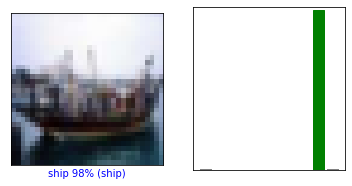

In [ ]:
# calling the function

# defining parameters to pass to function
i=18 # image number 12. we can change the value of i according to our needs
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, Y_test)
plt.show()


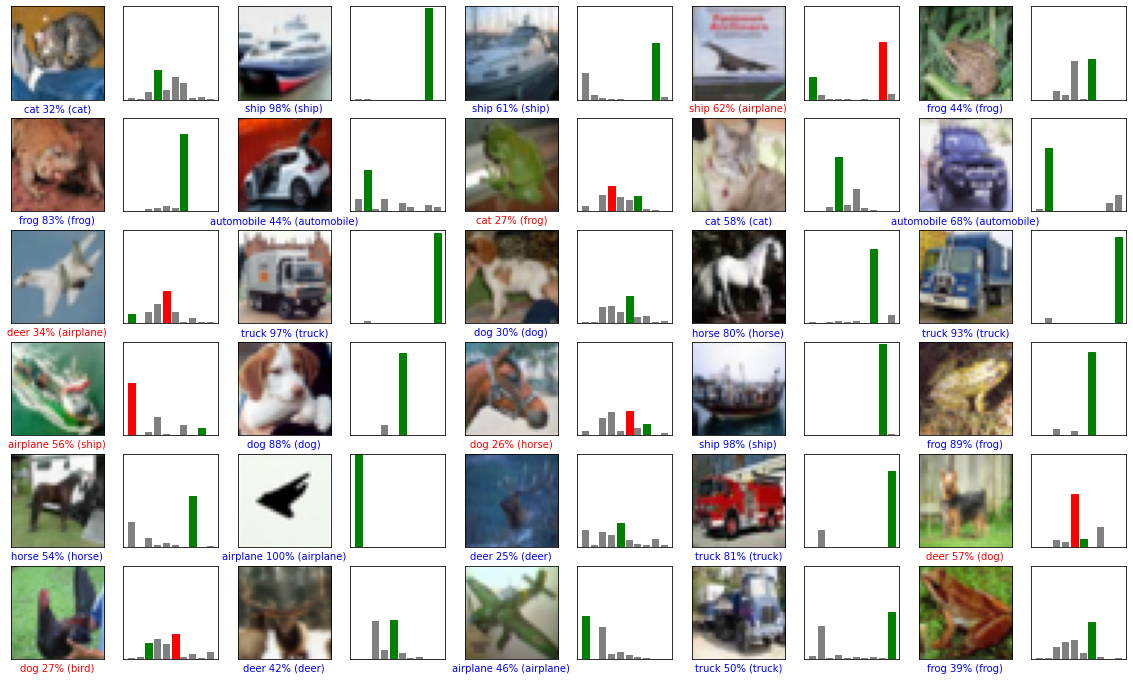

In [ ]:
# verification of several images

num_rows = 6
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, Y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, Y_test)
plt.show()